## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 52.2ms	remaining: 52.2s
1:	learn: 0.9301086	total: 56ms	remaining: 27.9s
2:	learn: 0.9005637	total: 59.6ms	remaining: 19.8s
3:	learn: 0.8720983	total: 63.3ms	remaining: 15.8s
4:	learn: 0.8467410	total: 66.4ms	remaining: 13.2s
5:	learn: 0.8226672	total: 69.6ms	remaining: 11.5s
6:	learn: 0.7994702	total: 72.8ms	remaining: 10.3s
7:	learn: 0.7784272	total: 75.9ms	remaining: 9.41s
8:	learn: 0.7602192	total: 79.2ms	remaining: 8.72s
9:	learn: 0.7412421	total: 82.3ms	remaining: 8.15s
10:	learn: 0.7247930	total: 85.4ms	remaining: 7.68s
11:	learn: 0.7089951	total: 88.4ms	remaining: 7.28s
12:	learn: 0.6951345	total: 91.5ms	remaining: 6.94s
13:	learn: 0.6809276	total: 94.6ms	remaining: 6.66s
14:	learn: 0.6692630	total: 97.8ms	remaining: 6.42s
15:	learn: 0.6588323	total: 101ms	remaining: 6.2s
16:	learn: 0.6472700	total: 104ms	remaining: 6.01s
17:	learn: 0.6379982	total: 107ms	remaining: 5.82s
18:	learn: 0.6294674	total: 110ms	remaining: 5.66s

40:	learn: 0.5196440	total: 186ms	remaining: 4.36s
41:	learn: 0.5170220	total: 190ms	remaining: 4.32s
42:	learn: 0.5141148	total: 192ms	remaining: 4.28s
43:	learn: 0.5116444	total: 195ms	remaining: 4.25s
44:	learn: 0.5100547	total: 198ms	remaining: 4.21s
45:	learn: 0.5069096	total: 201ms	remaining: 4.18s
46:	learn: 0.5051685	total: 204ms	remaining: 4.14s
47:	learn: 0.5033968	total: 207ms	remaining: 4.11s
48:	learn: 0.5012433	total: 210ms	remaining: 4.08s
49:	learn: 0.4986132	total: 213ms	remaining: 4.05s
50:	learn: 0.4968022	total: 216ms	remaining: 4.02s
51:	learn: 0.4951632	total: 219ms	remaining: 4s
52:	learn: 0.4928924	total: 223ms	remaining: 3.98s
53:	learn: 0.4917272	total: 226ms	remaining: 3.95s
54:	learn: 0.4895079	total: 229ms	remaining: 3.93s
55:	learn: 0.4881884	total: 232ms	remaining: 3.9s
56:	learn: 0.4861566	total: 235ms	remaining: 3.88s
57:	learn: 0.4850201	total: 238ms	remaining: 3.87s
58:	learn: 0.4840055	total: 241ms	remaining: 3.85s
59:	learn: 0.4824455	total: 244ms	r

103:	learn: 0.4466014	total: 378ms	remaining: 3.25s
104:	learn: 0.4461730	total: 381ms	remaining: 3.25s
105:	learn: 0.4457259	total: 384ms	remaining: 3.24s
106:	learn: 0.4451085	total: 387ms	remaining: 3.23s
107:	learn: 0.4447909	total: 390ms	remaining: 3.23s
108:	learn: 0.4440936	total: 394ms	remaining: 3.22s
109:	learn: 0.4435519	total: 397ms	remaining: 3.21s
110:	learn: 0.4431075	total: 400ms	remaining: 3.2s
111:	learn: 0.4425498	total: 403ms	remaining: 3.19s
112:	learn: 0.4419106	total: 406ms	remaining: 3.18s
113:	learn: 0.4414425	total: 409ms	remaining: 3.17s
114:	learn: 0.4407446	total: 412ms	remaining: 3.17s
115:	learn: 0.4402011	total: 415ms	remaining: 3.16s
116:	learn: 0.4398559	total: 418ms	remaining: 3.15s
117:	learn: 0.4392990	total: 421ms	remaining: 3.15s
118:	learn: 0.4389153	total: 424ms	remaining: 3.14s
119:	learn: 0.4383331	total: 427ms	remaining: 3.13s
120:	learn: 0.4378136	total: 430ms	remaining: 3.13s
121:	learn: 0.4375553	total: 433ms	remaining: 3.12s
122:	learn: 0

165:	learn: 0.4180680	total: 570ms	remaining: 2.86s
166:	learn: 0.4176884	total: 573ms	remaining: 2.86s
167:	learn: 0.4173026	total: 577ms	remaining: 2.85s
168:	learn: 0.4170486	total: 580ms	remaining: 2.85s
169:	learn: 0.4165960	total: 583ms	remaining: 2.85s
170:	learn: 0.4161870	total: 586ms	remaining: 2.84s
171:	learn: 0.4156228	total: 589ms	remaining: 2.83s
172:	learn: 0.4153041	total: 592ms	remaining: 2.83s
173:	learn: 0.4148857	total: 595ms	remaining: 2.83s
174:	learn: 0.4144190	total: 598ms	remaining: 2.82s
175:	learn: 0.4140875	total: 601ms	remaining: 2.81s
176:	learn: 0.4136755	total: 605ms	remaining: 2.81s
177:	learn: 0.4133860	total: 608ms	remaining: 2.81s
178:	learn: 0.4129780	total: 611ms	remaining: 2.8s
179:	learn: 0.4122907	total: 614ms	remaining: 2.8s
180:	learn: 0.4119188	total: 618ms	remaining: 2.79s
181:	learn: 0.4115412	total: 621ms	remaining: 2.79s
182:	learn: 0.4112620	total: 624ms	remaining: 2.79s
183:	learn: 0.4107734	total: 627ms	remaining: 2.78s
184:	learn: 0.

228:	learn: 0.3963073	total: 764ms	remaining: 2.57s
229:	learn: 0.3960925	total: 767ms	remaining: 2.57s
230:	learn: 0.3957018	total: 770ms	remaining: 2.56s
231:	learn: 0.3954162	total: 773ms	remaining: 2.56s
232:	learn: 0.3951665	total: 776ms	remaining: 2.55s
233:	learn: 0.3949269	total: 779ms	remaining: 2.55s
234:	learn: 0.3945894	total: 782ms	remaining: 2.55s
235:	learn: 0.3944181	total: 785ms	remaining: 2.54s
236:	learn: 0.3941497	total: 788ms	remaining: 2.54s
237:	learn: 0.3939819	total: 791ms	remaining: 2.53s
238:	learn: 0.3938322	total: 794ms	remaining: 2.53s
239:	learn: 0.3935463	total: 797ms	remaining: 2.52s
240:	learn: 0.3933166	total: 801ms	remaining: 2.52s
241:	learn: 0.3930992	total: 804ms	remaining: 2.52s
242:	learn: 0.3928898	total: 807ms	remaining: 2.51s
243:	learn: 0.3926199	total: 810ms	remaining: 2.51s
244:	learn: 0.3923955	total: 813ms	remaining: 2.5s
245:	learn: 0.3922312	total: 816ms	remaining: 2.5s
246:	learn: 0.3919499	total: 819ms	remaining: 2.5s
247:	learn: 0.3

291:	learn: 0.3813529	total: 956ms	remaining: 2.32s
292:	learn: 0.3812172	total: 960ms	remaining: 2.31s
293:	learn: 0.3809978	total: 963ms	remaining: 2.31s
294:	learn: 0.3807825	total: 966ms	remaining: 2.31s
295:	learn: 0.3805940	total: 969ms	remaining: 2.3s
296:	learn: 0.3801959	total: 972ms	remaining: 2.3s
297:	learn: 0.3799439	total: 975ms	remaining: 2.3s
298:	learn: 0.3797228	total: 978ms	remaining: 2.29s
299:	learn: 0.3795554	total: 981ms	remaining: 2.29s
300:	learn: 0.3793733	total: 984ms	remaining: 2.29s
301:	learn: 0.3791607	total: 987ms	remaining: 2.28s
302:	learn: 0.3789297	total: 990ms	remaining: 2.28s
303:	learn: 0.3787482	total: 994ms	remaining: 2.27s
304:	learn: 0.3786528	total: 997ms	remaining: 2.27s
305:	learn: 0.3784406	total: 999ms	remaining: 2.27s
306:	learn: 0.3782934	total: 1s	remaining: 2.26s
307:	learn: 0.3781631	total: 1s	remaining: 2.26s
308:	learn: 0.3779278	total: 1.01s	remaining: 2.25s
309:	learn: 0.3777358	total: 1.01s	remaining: 2.25s
310:	learn: 0.3775809

354:	learn: 0.3694397	total: 1.15s	remaining: 2.09s
355:	learn: 0.3692589	total: 1.15s	remaining: 2.08s
356:	learn: 0.3691107	total: 1.16s	remaining: 2.08s
357:	learn: 0.3689645	total: 1.16s	remaining: 2.08s
358:	learn: 0.3687886	total: 1.16s	remaining: 2.07s
359:	learn: 0.3686485	total: 1.16s	remaining: 2.07s
360:	learn: 0.3685749	total: 1.17s	remaining: 2.07s
361:	learn: 0.3683909	total: 1.17s	remaining: 2.06s
362:	learn: 0.3682710	total: 1.17s	remaining: 2.06s
363:	learn: 0.3681254	total: 1.18s	remaining: 2.06s
364:	learn: 0.3679761	total: 1.18s	remaining: 2.05s
365:	learn: 0.3677932	total: 1.18s	remaining: 2.05s
366:	learn: 0.3676022	total: 1.19s	remaining: 2.05s
367:	learn: 0.3674148	total: 1.19s	remaining: 2.04s
368:	learn: 0.3673439	total: 1.19s	remaining: 2.04s
369:	learn: 0.3671985	total: 1.2s	remaining: 2.04s
370:	learn: 0.3670563	total: 1.2s	remaining: 2.03s
371:	learn: 0.3669128	total: 1.2s	remaining: 2.03s
372:	learn: 0.3668381	total: 1.2s	remaining: 2.02s
373:	learn: 0.36

417:	learn: 0.3592759	total: 1.34s	remaining: 1.86s
418:	learn: 0.3591088	total: 1.34s	remaining: 1.86s
419:	learn: 0.3589470	total: 1.34s	remaining: 1.86s
420:	learn: 0.3587972	total: 1.35s	remaining: 1.85s
421:	learn: 0.3586831	total: 1.35s	remaining: 1.85s
422:	learn: 0.3585620	total: 1.35s	remaining: 1.85s
423:	learn: 0.3584427	total: 1.36s	remaining: 1.84s
424:	learn: 0.3583044	total: 1.36s	remaining: 1.84s
425:	learn: 0.3581698	total: 1.36s	remaining: 1.84s
426:	learn: 0.3580461	total: 1.36s	remaining: 1.83s
427:	learn: 0.3579182	total: 1.37s	remaining: 1.83s
428:	learn: 0.3577521	total: 1.37s	remaining: 1.82s
429:	learn: 0.3576138	total: 1.37s	remaining: 1.82s
430:	learn: 0.3575528	total: 1.38s	remaining: 1.82s
431:	learn: 0.3574686	total: 1.38s	remaining: 1.81s
432:	learn: 0.3572923	total: 1.38s	remaining: 1.81s
433:	learn: 0.3571859	total: 1.39s	remaining: 1.81s
434:	learn: 0.3570185	total: 1.39s	remaining: 1.8s
435:	learn: 0.3568416	total: 1.39s	remaining: 1.8s
436:	learn: 0.

481:	learn: 0.3503906	total: 1.53s	remaining: 1.64s
482:	learn: 0.3501522	total: 1.53s	remaining: 1.64s
483:	learn: 0.3500494	total: 1.53s	remaining: 1.64s
484:	learn: 0.3498921	total: 1.54s	remaining: 1.63s
485:	learn: 0.3497143	total: 1.54s	remaining: 1.63s
486:	learn: 0.3496172	total: 1.54s	remaining: 1.63s
487:	learn: 0.3494609	total: 1.55s	remaining: 1.62s
488:	learn: 0.3493200	total: 1.55s	remaining: 1.62s
489:	learn: 0.3491550	total: 1.55s	remaining: 1.62s
490:	learn: 0.3490323	total: 1.56s	remaining: 1.61s
491:	learn: 0.3488767	total: 1.56s	remaining: 1.61s
492:	learn: 0.3487285	total: 1.56s	remaining: 1.61s
493:	learn: 0.3486318	total: 1.56s	remaining: 1.6s
494:	learn: 0.3485016	total: 1.57s	remaining: 1.6s
495:	learn: 0.3484072	total: 1.57s	remaining: 1.6s
496:	learn: 0.3482698	total: 1.57s	remaining: 1.59s
497:	learn: 0.3481630	total: 1.58s	remaining: 1.59s
498:	learn: 0.3480855	total: 1.58s	remaining: 1.59s
499:	learn: 0.3478655	total: 1.58s	remaining: 1.58s
500:	learn: 0.3

545:	learn: 0.3421242	total: 1.72s	remaining: 1.43s
546:	learn: 0.3419673	total: 1.73s	remaining: 1.43s
547:	learn: 0.3418121	total: 1.73s	remaining: 1.43s
548:	learn: 0.3416228	total: 1.73s	remaining: 1.42s
549:	learn: 0.3414331	total: 1.74s	remaining: 1.42s
550:	learn: 0.3413090	total: 1.74s	remaining: 1.42s
551:	learn: 0.3411591	total: 1.74s	remaining: 1.41s
552:	learn: 0.3410901	total: 1.74s	remaining: 1.41s
553:	learn: 0.3409923	total: 1.75s	remaining: 1.41s
554:	learn: 0.3408730	total: 1.75s	remaining: 1.4s
555:	learn: 0.3408310	total: 1.75s	remaining: 1.4s
556:	learn: 0.3407365	total: 1.76s	remaining: 1.4s
557:	learn: 0.3406506	total: 1.76s	remaining: 1.39s
558:	learn: 0.3405352	total: 1.76s	remaining: 1.39s
559:	learn: 0.3404352	total: 1.76s	remaining: 1.39s
560:	learn: 0.3403419	total: 1.77s	remaining: 1.38s
561:	learn: 0.3402836	total: 1.77s	remaining: 1.38s
562:	learn: 0.3402264	total: 1.77s	remaining: 1.38s
563:	learn: 0.3400466	total: 1.78s	remaining: 1.37s
564:	learn: 0.3

608:	learn: 0.3354512	total: 1.91s	remaining: 1.23s
609:	learn: 0.3353398	total: 1.91s	remaining: 1.22s
610:	learn: 0.3352669	total: 1.92s	remaining: 1.22s
611:	learn: 0.3351716	total: 1.92s	remaining: 1.22s
612:	learn: 0.3351155	total: 1.92s	remaining: 1.21s
613:	learn: 0.3350041	total: 1.93s	remaining: 1.21s
614:	learn: 0.3349098	total: 1.93s	remaining: 1.21s
615:	learn: 0.3348304	total: 1.93s	remaining: 1.2s
616:	learn: 0.3347009	total: 1.94s	remaining: 1.2s
617:	learn: 0.3346458	total: 1.94s	remaining: 1.2s
618:	learn: 0.3345381	total: 1.94s	remaining: 1.2s
619:	learn: 0.3344101	total: 1.94s	remaining: 1.19s
620:	learn: 0.3343267	total: 1.95s	remaining: 1.19s
621:	learn: 0.3342275	total: 1.95s	remaining: 1.19s
622:	learn: 0.3341456	total: 1.95s	remaining: 1.18s
623:	learn: 0.3340640	total: 1.96s	remaining: 1.18s
624:	learn: 0.3339122	total: 1.96s	remaining: 1.18s
625:	learn: 0.3337503	total: 1.96s	remaining: 1.17s
626:	learn: 0.3336593	total: 1.97s	remaining: 1.17s
627:	learn: 0.33

671:	learn: 0.3289913	total: 2.1s	remaining: 1.03s
672:	learn: 0.3288859	total: 2.1s	remaining: 1.02s
673:	learn: 0.3288145	total: 2.11s	remaining: 1.02s
674:	learn: 0.3286969	total: 2.11s	remaining: 1.02s
675:	learn: 0.3286108	total: 2.11s	remaining: 1.01s
676:	learn: 0.3285218	total: 2.12s	remaining: 1.01s
677:	learn: 0.3284620	total: 2.12s	remaining: 1.01s
678:	learn: 0.3283999	total: 2.12s	remaining: 1s
679:	learn: 0.3283506	total: 2.13s	remaining: 1s
680:	learn: 0.3282208	total: 2.13s	remaining: 997ms
681:	learn: 0.3281020	total: 2.13s	remaining: 994ms
682:	learn: 0.3280328	total: 2.13s	remaining: 991ms
683:	learn: 0.3279574	total: 2.14s	remaining: 988ms
684:	learn: 0.3278928	total: 2.14s	remaining: 985ms
685:	learn: 0.3278094	total: 2.14s	remaining: 982ms
686:	learn: 0.3277178	total: 2.15s	remaining: 979ms
687:	learn: 0.3276684	total: 2.15s	remaining: 975ms
688:	learn: 0.3275537	total: 2.15s	remaining: 972ms
689:	learn: 0.3274808	total: 2.16s	remaining: 969ms
690:	learn: 0.327383

732:	learn: 0.3235938	total: 2.29s	remaining: 834ms
733:	learn: 0.3235120	total: 2.29s	remaining: 831ms
734:	learn: 0.3234421	total: 2.29s	remaining: 828ms
735:	learn: 0.3233367	total: 2.3s	remaining: 825ms
736:	learn: 0.3232438	total: 2.3s	remaining: 821ms
737:	learn: 0.3231289	total: 2.3s	remaining: 818ms
738:	learn: 0.3230697	total: 2.31s	remaining: 815ms
739:	learn: 0.3229734	total: 2.31s	remaining: 812ms
740:	learn: 0.3228697	total: 2.31s	remaining: 809ms
741:	learn: 0.3227984	total: 2.32s	remaining: 806ms
742:	learn: 0.3226895	total: 2.32s	remaining: 802ms
743:	learn: 0.3225924	total: 2.32s	remaining: 799ms
744:	learn: 0.3225096	total: 2.33s	remaining: 796ms
745:	learn: 0.3224088	total: 2.33s	remaining: 793ms
746:	learn: 0.3223202	total: 2.33s	remaining: 790ms
747:	learn: 0.3222404	total: 2.33s	remaining: 787ms
748:	learn: 0.3221810	total: 2.34s	remaining: 783ms
749:	learn: 0.3221342	total: 2.34s	remaining: 780ms
750:	learn: 0.3220746	total: 2.34s	remaining: 777ms
751:	learn: 0.3

795:	learn: 0.3180848	total: 2.48s	remaining: 635ms
796:	learn: 0.3180327	total: 2.48s	remaining: 632ms
797:	learn: 0.3179305	total: 2.48s	remaining: 629ms
798:	learn: 0.3178456	total: 2.49s	remaining: 626ms
799:	learn: 0.3177655	total: 2.49s	remaining: 623ms
800:	learn: 0.3176826	total: 2.49s	remaining: 620ms
801:	learn: 0.3176217	total: 2.5s	remaining: 617ms
802:	learn: 0.3174842	total: 2.5s	remaining: 613ms
803:	learn: 0.3173800	total: 2.5s	remaining: 610ms
804:	learn: 0.3172892	total: 2.51s	remaining: 607ms
805:	learn: 0.3172199	total: 2.51s	remaining: 604ms
806:	learn: 0.3171379	total: 2.51s	remaining: 601ms
807:	learn: 0.3170699	total: 2.52s	remaining: 598ms
808:	learn: 0.3170027	total: 2.52s	remaining: 595ms
809:	learn: 0.3169244	total: 2.52s	remaining: 592ms
810:	learn: 0.3168075	total: 2.52s	remaining: 589ms
811:	learn: 0.3167047	total: 2.53s	remaining: 585ms
812:	learn: 0.3166132	total: 2.53s	remaining: 582ms
813:	learn: 0.3165391	total: 2.53s	remaining: 579ms
814:	learn: 0.3

858:	learn: 0.3131446	total: 2.67s	remaining: 438ms
859:	learn: 0.3130587	total: 2.67s	remaining: 435ms
860:	learn: 0.3129229	total: 2.68s	remaining: 432ms
861:	learn: 0.3128651	total: 2.68s	remaining: 429ms
862:	learn: 0.3127812	total: 2.68s	remaining: 426ms
863:	learn: 0.3126884	total: 2.69s	remaining: 423ms
864:	learn: 0.3126358	total: 2.69s	remaining: 420ms
865:	learn: 0.3125933	total: 2.69s	remaining: 416ms
866:	learn: 0.3125160	total: 2.69s	remaining: 413ms
867:	learn: 0.3124401	total: 2.7s	remaining: 410ms
868:	learn: 0.3123064	total: 2.7s	remaining: 407ms
869:	learn: 0.3122328	total: 2.7s	remaining: 404ms
870:	learn: 0.3121623	total: 2.71s	remaining: 401ms
871:	learn: 0.3121072	total: 2.71s	remaining: 398ms
872:	learn: 0.3120356	total: 2.71s	remaining: 395ms
873:	learn: 0.3119020	total: 2.71s	remaining: 391ms
874:	learn: 0.3118603	total: 2.72s	remaining: 388ms
875:	learn: 0.3117861	total: 2.72s	remaining: 385ms
876:	learn: 0.3116810	total: 2.72s	remaining: 382ms
877:	learn: 0.3

921:	learn: 0.3085073	total: 2.86s	remaining: 242ms
922:	learn: 0.3084388	total: 2.86s	remaining: 239ms
923:	learn: 0.3083752	total: 2.87s	remaining: 236ms
924:	learn: 0.3082889	total: 2.87s	remaining: 233ms
925:	learn: 0.3081901	total: 2.87s	remaining: 230ms
926:	learn: 0.3081106	total: 2.88s	remaining: 227ms
927:	learn: 0.3080422	total: 2.88s	remaining: 223ms
928:	learn: 0.3079770	total: 2.88s	remaining: 220ms
929:	learn: 0.3079316	total: 2.88s	remaining: 217ms
930:	learn: 0.3078660	total: 2.89s	remaining: 214ms
931:	learn: 0.3078147	total: 2.89s	remaining: 211ms
932:	learn: 0.3077165	total: 2.89s	remaining: 208ms
933:	learn: 0.3076207	total: 2.9s	remaining: 205ms
934:	learn: 0.3075333	total: 2.9s	remaining: 202ms
935:	learn: 0.3074829	total: 2.9s	remaining: 199ms
936:	learn: 0.3074088	total: 2.91s	remaining: 195ms
937:	learn: 0.3073356	total: 2.91s	remaining: 192ms
938:	learn: 0.3072158	total: 2.91s	remaining: 189ms
939:	learn: 0.3071693	total: 2.92s	remaining: 186ms
940:	learn: 0.3

980:	learn: 0.3042142	total: 3.05s	remaining: 59.1ms
981:	learn: 0.3041509	total: 3.06s	remaining: 56ms
982:	learn: 0.3041077	total: 3.06s	remaining: 52.9ms
983:	learn: 0.3040665	total: 3.06s	remaining: 49.8ms
984:	learn: 0.3040237	total: 3.07s	remaining: 46.7ms
985:	learn: 0.3039532	total: 3.07s	remaining: 43.6ms
986:	learn: 0.3038723	total: 3.07s	remaining: 40.5ms
987:	learn: 0.3038141	total: 3.08s	remaining: 37.4ms
988:	learn: 0.3037455	total: 3.08s	remaining: 34.3ms
989:	learn: 0.3036820	total: 3.08s	remaining: 31.1ms
990:	learn: 0.3036165	total: 3.09s	remaining: 28ms
991:	learn: 0.3035759	total: 3.09s	remaining: 24.9ms
992:	learn: 0.3035124	total: 3.1s	remaining: 21.8ms
993:	learn: 0.3034295	total: 3.1s	remaining: 18.7ms
994:	learn: 0.3033612	total: 3.1s	remaining: 15.6ms
995:	learn: 0.3033209	total: 3.1s	remaining: 12.5ms
996:	learn: 0.3032659	total: 3.11s	remaining: 9.35ms
997:	learn: 0.3032189	total: 3.11s	remaining: 6.23ms
998:	learn: 0.3031594	total: 3.11s	remaining: 3.12ms
9

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1504062.5178552896


#### Sanity Checks 

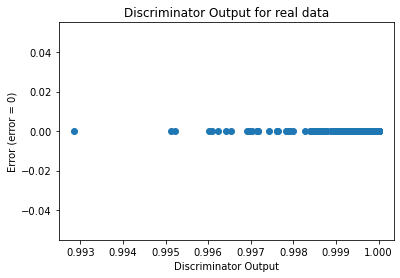

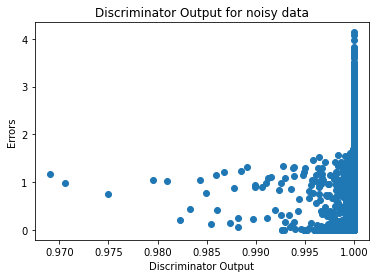

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)